## A Piece of Pi

This notebook has three sections. 


The upper section searches pi for a sequence of digits that you pick. Find the part that says "Put your digits here!" and make it say whatever you like. Then hold down the Shift key and press Enter. It may take some time (like a minute or two) if you choose something long like '88888888'. Maybe start with shorter sequences first, like '3333'. 


Pi starts out 3.14159265358979323846264338327950288419716939937510582097494459230781640628620899862803482534211...
In fact you can see the first 100,000 digits at http://www.geom.uiuc.edu/~huberty/math5337/groupe/digits.html. 


The middle section calculates pi using random numbers. We will describe how to do this at the next OMC meeting.


The final section is advanced. We haven't gotten to this yet but you are welcome to check it out! It concerns series expansion for a complex exponential, specifically for e raised to the i times pi over 2. We hope the cosine of pi over 2 turns out to be zero and the sine is one.


#### Section 1: Finding digits in pi

In [ ]:
def iter_file(filename, chunksize=100000):
    with open(filename) as f:
        while True:
            substring = f.read(chunksize)
            if not substring:
                return
            # for Python 3
            # yield from substring
            # for Python 2
            for char in substring:
                yield char

from toolz import sliding_window

def look_for_sequence(filename, sequence):
    s = iter_file(filename)

    for i, group in enumerate(sliding_window(len(sequence), s)):
        if ''.join(group) == sequence:
            print ('found your sequence "{0}" at location {1} in pi'.format(sequence, i))
            break
            

# 'data/pi.txt' is the first one million digits of pi
# 'data/pi-billion.txt' is the first one billion digits of pi


# **************************
# Put your digits here! (replace whatever is inside the single-quotes)
# **************************

my_digits = '9999999'

# **************************
# When you are done with that hold down Shift and press Enter!
# **************************

look_for_sequence('data/pi-billion.txt', my_digits)

#### Section 2: Calculate Pi

We will not be able to calculate pi very accurately using these ideas; but approximate will be fun! Why? Because even when pi isn't very good... its still pretty good!

First we calculate pi using random darts. 

Then we use a more exhaustive method that counts up little squares.

In [ ]:
# This cell takes about 15 seconds to run.
# It throws 4 million darts at a dart board. If they land inside a circle they "count"
# At the end it uses the number of hits to calculate pi.

import numpy as np
import random as r

hits = 0.0
nDarts = 4000000
fDarts = float(nDarts)
for i in range(nDarts):
    x = r.random()
    y = r.random()
    if np.sqrt(x*x+y*y) <= 1.0: hits += 1.0

print 4.0*hits/fDarts 
    

This cell calculates pi more methodically using an exhaustion of little squares.

In [ ]:
# count up little squares to get pi. Those squares must be inside the unit circle, that is, 
#   the circle at the origin with a radius of 1. 

# We will loop over little boxes at location (x, y).  
# x ranges from 0 to 1 and y ranges from 0 to 1. The total area of this box is what? 
# We only count boxes in our total if they are at a distance of 1 or less from the origin.
# How do we calculate that distance (what is the name of the formula)?
# Once we are done we have looked at only one quadrant of the unit circle.
# Therefore we multiply the answer by what? 

import numpy as np

# Change the value of 'size_of_square' to see how it affects the approximation of pi.
# If you make this value very small (less than 0.001) it will start to take a long time to finish!
size_of_square = 0.001

how_many_squares = int(1.0 / size_of_square)

print 'There are', how_many_squares, 'little squares on one side of the big square.'

area_of_little_square = size_of_square * size_of_square

print 'The little squares have an area of', area_of_little_square, 'square units.'
print '   (a number like 1e-06 is read "one times ten to the minus six" or "one millionth")'

# area is a bucket of variable that will increase when we find little squares inside the circle
area = 0.0

for x in np.arange(0.0, 1.0, size_of_square):
    for y in np.arange(0.0, 1.0, size_of_square):
        dist = np.sqrt(x*x+y*y)
        if dist < 1.0:
            area = area + area_of_little_square

# area is just in the first quadrant; so let's multiply it by four to account for all 4 quadrants
area = area * 4

print 'Our estimate of pi is ', area

# It would be nice to create a little drawing of this

In [ ]:
# with sq 0.025 got 3.2325
# with sq 0.005 got 3.1602
# with sq 0.001 got 3.14552
# with sq 0.0005 got 3.143579
# with sq 0.0001 got 3.14199016
# with sq 0.00001 got 3.14163274808

It would also be pleasant to calculate the volume of a sphere and the area of a sphere.

#### Section 3: Complex exponential series expansion for sine and cosine

In [ ]:
print "numpy is numpy"

In [ ]:
import numpy as np
pi = np.pi
print 'pi is', pi

# let's add up the even-numbered terms... 0, 2, 4... we hope they equal 0 
evenSum = 1 - pi*pi/8 + (pi*pi*pi*pi)/(2*2*2*2)/(4*3*2*1)
print evenSum

In [ ]:
# let's add up the odd-numbered terms... 1, 3, 5... we hope they equal 1
oddSum = pi/2 - (pi*pi*pi)/48 + (pi*pi*pi*pi*pi)/(2*2*2*2*2)/120
print oddSum

In [ ]:
def IsOdd(number):
    if number % 2 == 0: return False
    else: return True

In [ ]:
def Factorial(number):
    if number == 0: return 1
    if number == 1: return 1
    if number > 1:
        factorial = 1
        for j in range(number):
            factorial = factorial * (j+1)
        return factorial

In [ ]:
def Numerator(number, power):
    return np.power(number, power)

In [ ]:
def ThisEvenTerm(x, term):
    termOverTwo = term/2
    if IsOdd(termOverTwo):
        thisSign = -1
    else:
        thisSign = 1
    return thisSign*Numerator(x, term)/Factorial(term)

In [ ]:
def ThisOddTerm(x, term):
    termMinusOne = term - 1
    termMinusOneOverTwo = termMinusOne/2
    if IsOdd(termMinusOneOverTwo):
        thisSign = -1
    else:
        thisSign = 1
    return thisSign*Numerator(x, term)/Factorial(term)

In [ ]:
oddSum = 0.0
evenSum = 0.0
x = pi/2
for term in range(17):
    print term
    if IsOdd(term):
        oddSum = oddSum + ThisOddTerm(x, term)
    else:
        evenSum = evenSum + ThisEvenTerm(x, term)

print 'even sum:', round(evenSum, 8)
print 'odd sum:', round(oddSum, 8)

#### Section 3 Calculating pi from arc length

Suppose you are interested in measuring the perimeter of a circle with radius 1. We 'know' that this distance will prove to be about 6.28..., in other words 2 times pi. But can we calculate that in some way? That is what this section attempts to do. The math is a bit technical for middle school; so you may want to read/skim and you can always talk to us to dig deeper.

Imagine you use a compass to draw the circle centered on the origin. Now draw four inscribed lines to make a rotated square: From (1, 0) to (0, 1) to (-1, 0) to (0, -1) back to (1, 0). Each of these lines has a length of (square root of 2) from the pythagorean formula. Let's abbreviate 'square root of 2' as sqrt(2). So our first estimate for the perimeter of the unit circle is 4 x sqrt(2) or about 5.657. This is obviously a low estimate because our square is inscribed inside the circle; it does not follow the curved perimeter very well. 

Here is the important idea for what follows: We can look at this square as an inscribed regular polygon with four sides and we can use it to build another regular polygon with twice as many sides that will be a closer approximation to the shape of the circle... and we can keep on doing this 'doubling' process a whole bunch of times until our polygon looks a lot like the unit circle. Therefore our approximate values for the perimeter should get closer and closer to the right answer. 

In creating these polygons the first vertex is always at (1, 0). The second vertex has coordinates (c, s) based on the central angle subtended by each edge of the polygon. Once we know (c) and (s) we can calculate the distance from there to (1, 0) and multiply that distance by n, the number of vertices / edges in the polygon. That will be our estimate of the perimeter of the circle.

Each time we double the number of vertices n we cut the subtended angle in half. Fortunately the new coordinates (c2, s2) are easy to determine from (c, s) using trigonometry rules. 

Let's calculate pi using a known value of cosine and the 'half angle' formula. This method has both a good and a bad aspect to it. The good aspect is that there is some circular reasoning involved, in particular we are calling the circumference of the unit circle '2 pi' without much justification. On the positive side the calculation itself only involves square roots... so it is a pi-free calculation that approximates pi. 

As Isabella will tell you $$d(e^{i\theta},1)=\sqrt{2-2\cos \theta}$$

Suppose we know s = the arc-length from 1 to pi/4. Then pi is approximately this arc length times eight (because pi/4 fits into 2 * pi eight times. That is the circular reasoning bit. 

If we have a rule for getting cos (theta / 2) then we could get a slightly better estimate of pi by cutting pi/4 in half to get pi/8. Calculate that distance and multiply it by 16 because there are twice as many segments. What we are doing, you see, is inscribing polygons into the unit circle. Each polygon has twice the number of vertices as the previous one. The important equation is the cosine half-angle formula:

$$\cos\left(\frac{\theta}{2}\right)=\sqrt\frac{\cos\theta+1}{2}$$

We can take a recursive approach to this calculation. We can start at pi/4 and call that n=1. That is an octagon inscribed inside the unit circle. Then what is the improved calculation for pi using the half-angle pi/8? Call that n + 1. And then recurse to n + 2, n + 3, n + 4, ...

$$\cos\theta_{n+1}=\sqrt{\frac{\cos\theta_{n}+1}{2}}$$

where

$$\cos\theta_{1}=\frac{\sqrt{2}}{2}$$

and now here is the next estimate of pi: 
    
$$\pi_{n+1} = 2^{2+n}\cdot\sqrt{2-2\cos\theta_{n+1}}$$

In [23]:
import numpy as np

def next_cos_theta(cos_theta):
    return np.sqrt((cos_theta + 1.0)/2.0)

def next_pi(n, cos_theta):
    return np.power(2.0, 3.0 + n)*np.sqrt(2.0-2.0*cos_theta)

nIterations = 20

cos_theta_1 = np.sqrt(2.0)/2.0
ct = cos_theta_1
pi_est = []

for n in range(nIterations):
    nct = next_cos_theta(ct)
    nxtpi = next_pi(n, nct)
    print 'iteration', n+1, 'pi estimate', nxtpi
    pi_est.append(nxtpi)
    ct = nct
    


iteration 1 pi estimate 3.12144515226
iteration 2 pi estimate 3.13654849055
iteration 3 pi estimate 3.14033115695
iteration 4 pi estimate 3.14127725093
iteration 5 pi estimate 3.14151380114
iteration 6 pi estimate 3.14157294037
iteration 7 pi estimate 3.14158772528
iteration 8 pi estimate 3.1415914215
iteration 9 pi estimate 3.14159234561
iteration 10 pi estimate 3.14159257655
iteration 11 pi estimate 3.14159263346
iteration 12 pi estimate 3.14159265481
iteration 13 pi estimate 3.14159264532
iteration 14 pi estimate 3.14159260738
iteration 15 pi estimate 3.14159291094
iteration 16 pi estimate 3.1415941252
iteration 17 pi estimate 3.1415965537
iteration 18 pi estimate 3.1415965537
iteration 19 pi estimate 3.14167426502
iteration 20 pi estimate 3.14182968189


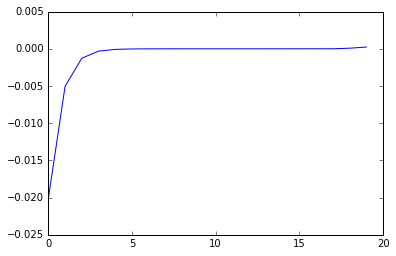

In [10]:
# make plots inline (so that they do not pop-out)
%matplotlib inline

# get the plotting library going (this is how we make plots)
import matplotlib.pyplot as plt

# math library (this is how we do advanced mathematics using Python)
import numpy as np

# make a little plot going from 0 to 5 in steps of 0.01
pi_err = [x-np.pi for x in pi_est]
plt.plot(pi_err)

(-1.0, 1.0, -1.0, 1.0)

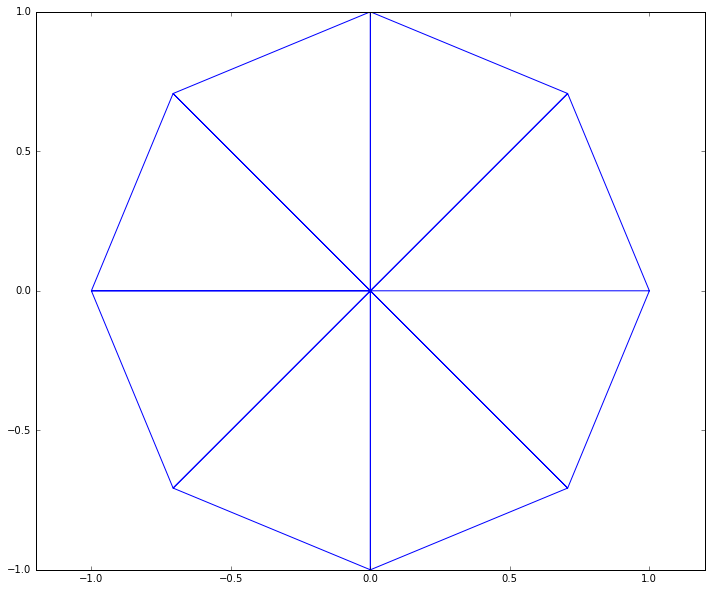

In [22]:
# This code draws the polygon. Increase n_polygon to make it look more like the unit circle.

###################
###################
##
## other math club: change the value of n_polygon
##
###################
###################

n_polygon = 8

dtheta = np.pi*2.0/n_polygon
px = []
py = []
theta = 0.0

for i in range(n_polygon):
    px.append(0.0)
    py.append(0.0)
    px.append(np.cos(theta))
    py.append(np.sin(theta))
    px.append(np.cos(theta+dtheta))
    py.append(np.sin(theta+dtheta))
    theta += dtheta

fig, ax = plt.subplots(figsize=(12,10))
ax.plot(px, py)
ax.axis('equal')